### Import Dependencies

In [1]:
import torchvision as tv
import torch
from torchvision.transforms import v2
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader
import random

### Dataset

In [51]:
transforms = v2.Compose([
                        v2.ToImage(),
                        v2.ToDtype(torch.float32, scale=True),
                        v2.Normalize(mean=[0.2869, 0.3251, 0.2839], std=[0.1870, 0.1902, 0.1872])
                    ])

target_transforms = v2.Compose([
                        v2.ToImage(),
                    ])

train_dataset = tv.datasets.Cityscapes(
    "../data/cityspaces", split="train", mode="fine", target_type="semantic", 
     transform=transforms, target_transform=target_transforms
)

val_dataset = tv.datasets.Cityscapes(
    "../data/cityspaces", split="val", mode="fine", target_type="semantic",
    transform=transforms, target_transform=transforms
)

test_dataset = tv.datasets.Cityscapes(
    "../data/cityspaces", split="test", mode="fine", target_type="semantic",
    transform=transforms, target_transform=transforms
)

tensor([ 1,  3,  4,  6,  7,  8, 11, 13, 17, 19, 20, 21, 22, 23, 24, 26, 27, 33],
       dtype=torch.uint8)


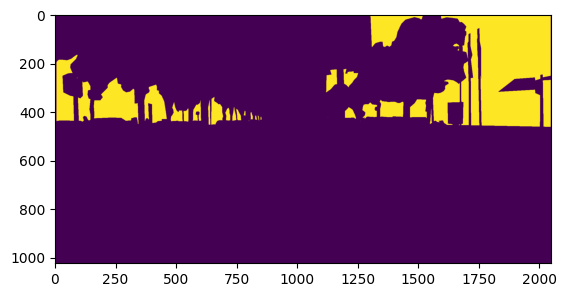

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.5342246..3.8253205].


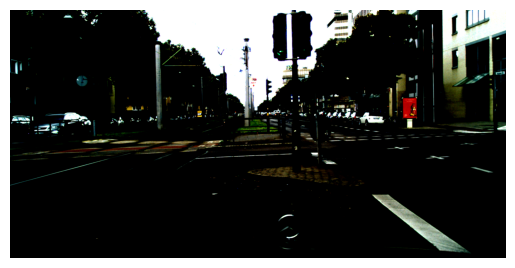

In [52]:
image, semantic = train_dataset[732]
unique = semantic.unique()
print(unique)
semantic = torch.where(semantic == 11, semantic, torch.tensor(0))
plt.imshow(semantic.squeeze())
plt.show()
plt.imshow(image.permute(1,2,0))
plt.axis('off')
plt.show()

In [37]:
for id in list(unique):
    for c in train_dataset.classes:
        if c.id == id:
            print(c.name, c.id)

ego vehicle 1
out of roi 3
static 4
ground 6
road 7
sidewalk 8
building 11
fence 13
pole 17
traffic light 19
traffic sign 20
vegetation 21
terrain 22
sky 23
person 24
car 26
truck 27
bicycle 33


In [50]:
import numpy as np
train_loader = DataLoader(dataset=train_dataset, batch_size=16)

def compute_mean_std(dataloader):
    total_sum = 0.0
    total_sum_sq = 0.0
    num_batches = 0

    for data, *_ in dataloader:
        data = data.to(torch.float32)
        total_sum += data.sum([0, 2, 3])
        total_sum_sq += (data ** 2).sum([0, 2, 3])
        num_batches += data.size(0)

    mean = total_sum / (num_batches * data.size(2) * data.size(3))
    std = torch.sqrt((total_sum_sq / (num_batches * data.size(2) * data.size(3))) - (mean ** 2))

    return mean, std


mean, std = compute_mean_std(train_loader)
mean, std

(tensor([0.2869, 0.3251, 0.2839]), tensor([0.1870, 0.1902, 0.1872]))

In [48]:
def visualize(dataset, index=None):
    if not index:
        index = random.randint(0, len(dataset.images))
        
    image, semantic = dataset[index]
    fig, axis = plt.subplots(1,2, figsize=(20,11))
    axis[0].imshow(image.permute(1,2,0))
    axis[1].imshow(semantic.permute(1,2,0))
    return None

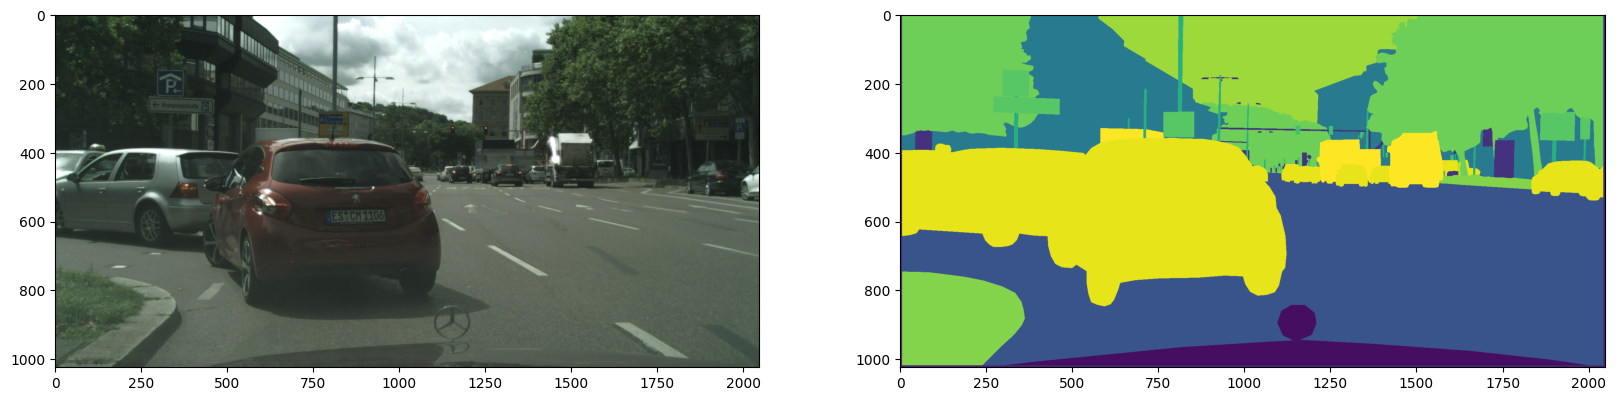

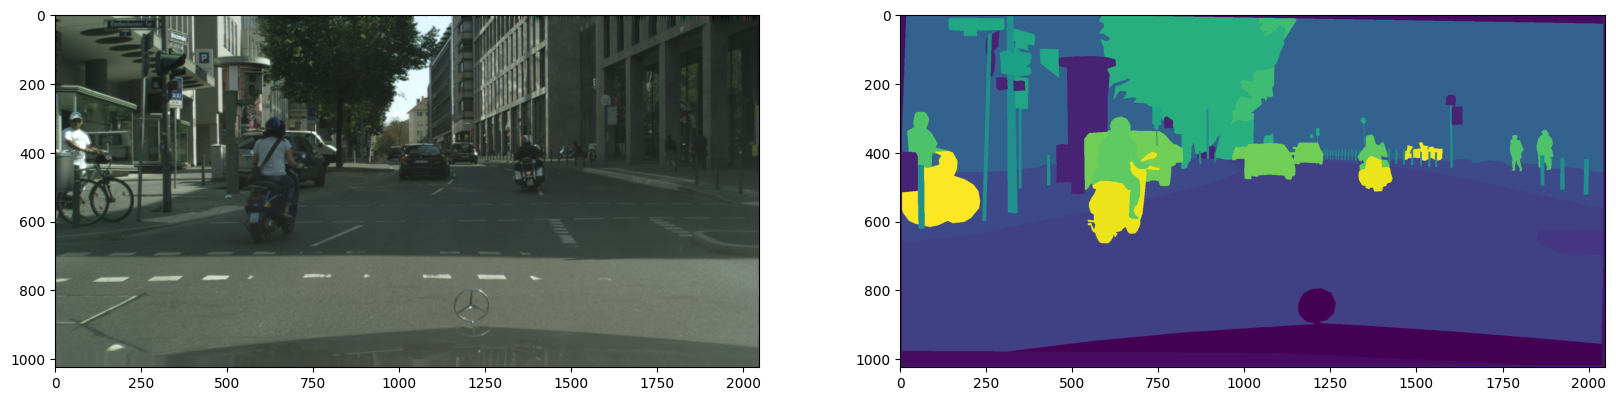

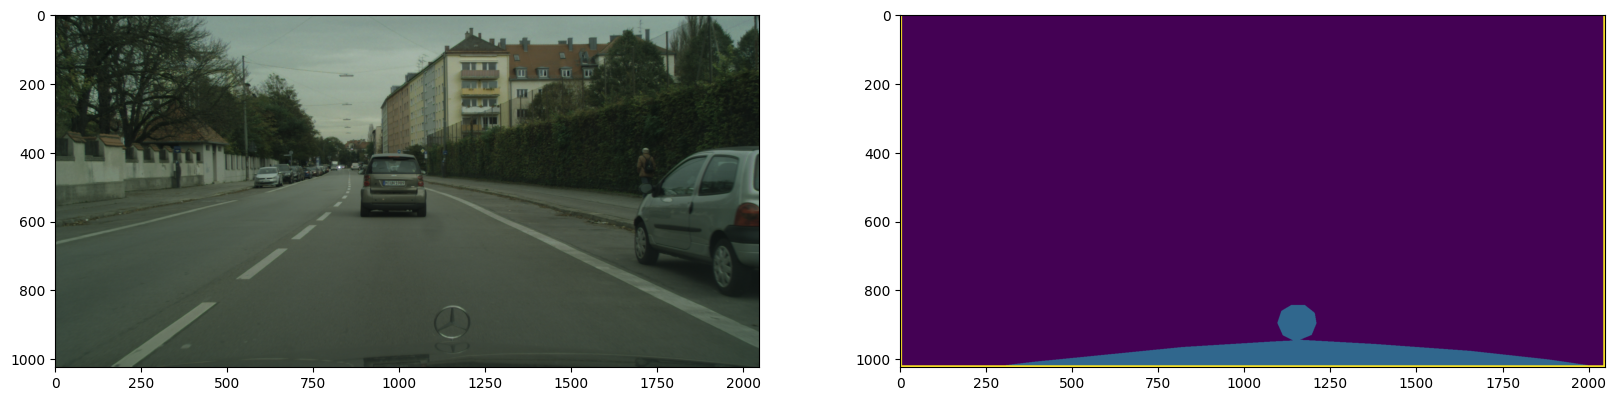

In [49]:
visualize(train_dataset)
visualize(val_dataset)
visualize(test_dataset)